In [29]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [30]:
import pandas as pd
import numpy as np
# matplotlib is the Python library for drawing diagrams
import matplotlib.pylab as plt
%matplotlib inline
# set the size of the diagrams
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
from sklearn.model_selection import TimeSeriesSplit

## Dataprep

In [3]:
ts = pd.read_csv('./data/dataframe_yearly.csv', index_col=0, usecols=[0,2])


In [4]:
ts.head()

,ice_extent
Year,
1979,12.349634
1980,12.349545
1981,12.147230
1982,12.467336
1983,12.353095


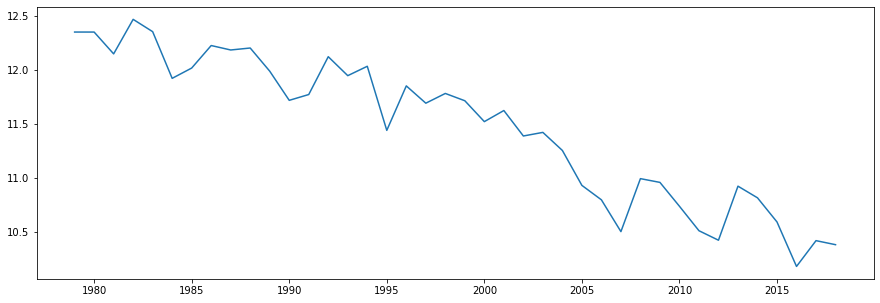

In [31]:
plt.plot(ts)

In [32]:
# Define train and testset
X = ts.index.values
y = ts.values
testsize = 3
size = len(ts.values)
X_train, X_test, y_train, y_test = X[:-testsize], X[-testsize:], y[:-testsize], y[-testsize:]

### Cross validation setup

In [33]:
tscv = TimeSeriesSplit(max_train_size=40, n_splits=20)

In [34]:
tscv.split(X)

<generator object TimeSeriesSplit.split at 0x0000023FD00789C8>

In [35]:
for train_index, test_index in tscv.split(X):
    print(train_index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16

In [36]:
# cross_val_score(knn, X_train, y_train, cv=tss , scoring='accuracy')

In [37]:
ts = ts.squeeze()

In [38]:
ts

Year
1979    12.349634
1980    12.349545
1981    12.147230
1982    12.467336
1983    12.353095
1984    11.920382
1985    12.015835
1986    12.224548
1987    12.183318
1988    12.201616
1989    11.986788
1990    11.716385
1991    11.770302
1992    12.121065
1993    11.945254
1994    12.032209
1995    11.437963
1996    11.850327
1997    11.689949
1998    11.780257
1999    11.712603
2000    11.518993
2001    11.621888
2002    11.385820
2003    11.419148
2004    11.251586
2005    10.927786
2006    10.793886
2007    10.499133
2008    10.990294
2009    10.955518
2010    10.734207
2011    10.507405
2012    10.419335
2013    10.920494
2014    10.812470
2015    10.588599
2016    10.176126
2017    10.415373
2018    10.377886
Name: ice_extent, dtype: float64

### Define testing methods

In [39]:
def calc_rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100

### ARIMA

In [40]:
ts_clean = ts.dropna().reset_index().drop(columns=['Year']).squeeze()

In [41]:
tscv = TimeSeriesSplit(n_splits = 10, max_train_size=35)

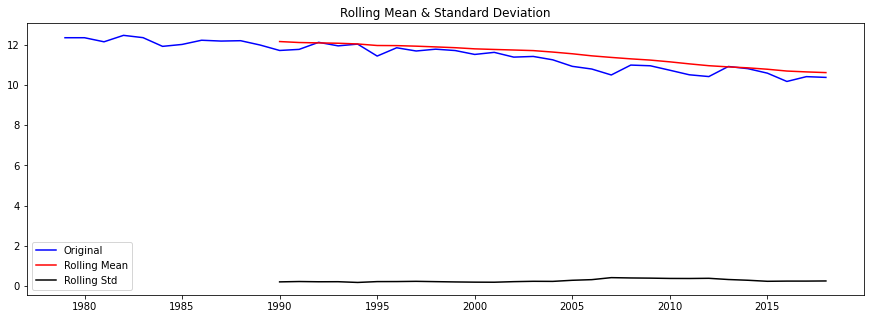

In [42]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
test_stationarity(ts)

Duidelijk dalende trend dus passen we differentiatie toe

In [43]:
moving_avg = ts.rolling(3).mean()
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff

Year
1979         NaN
1980         NaN
1981   -0.134907
1982    0.145966
1983    0.030541
1984   -0.326555
1985   -0.080602
1986    0.170960
1987    0.042085
1988   -0.001545
1989   -0.137119
1990   -0.251878
1991   -0.054190
1992    0.251814
1993   -0.000287
1994   -0.000633
1995   -0.367179
1996    0.076827
1997    0.030536
1998    0.006746
1999   -0.015000
2000   -0.151624
2001    0.004060
2002   -0.123081
2003   -0.056471
2004   -0.100599
2005   -0.271720
2006   -0.197200
2007   -0.241135
2008    0.229190
2009    0.140537
2010   -0.159133
2011   -0.224972
2012   -0.134314
2013    0.304749
2014    0.095037
2015   -0.185255
2016   -0.349606
2017    0.022007
2018    0.054758
Name: ice_extent, dtype: float64

In [44]:
ts_moving_avg_diff.dropna(inplace=True)

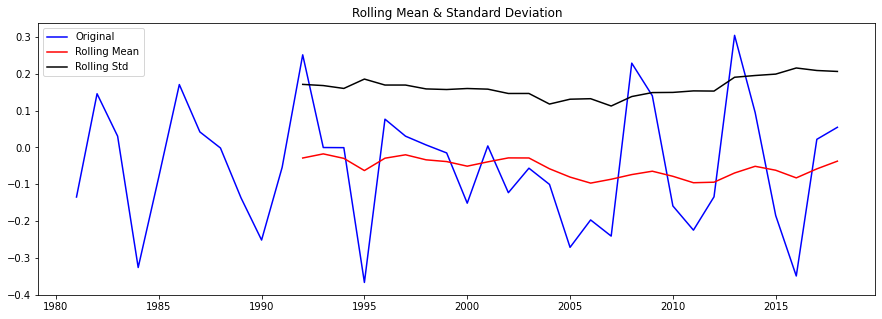

In [45]:
test_stationarity(ts_moving_avg_diff)

Deze data is stationair dus kunnen we het model beginnen opbouwen

In [46]:
pdq = (3,0,0)

In [47]:
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
import sys
from statsmodels.tsa.arima_model import ARIMA

warnings.filterwarnings("ignore") # specify to ignore warning messages


maes = []

for train_index, test_index in tscv.split(ts_moving_avg_diff):
    
    # initialize cross validation train and test sets
    cv_train, cv_test = ts_moving_avg_diff.iloc[train_index], ts_moving_avg_diff.iloc[test_index]
   
    print("TRAIN:", train_index, "TEST:", test_index) # visiualize cross_validation structure for reference

    # build model
    arima = ARIMA(cv_train, pdq).fit(start_ar_lags=1,disp=False)

    # make predictions
    predictions = arima.forecast(steps=3)
    prediction_values = predictions[0]
    true_values = cv_test.values
    
    # error calc
    maes.append(mean_absolute_error(true_values, prediction_values))
    
    # last actual prediction 
    last_prediction = prediction_values + moving_avg.dropna().iloc[test_index]

mae_mean = np.mean(maes)
print()
print("Mean MAE: {}".format(mae_mean))
MAE_ARIMA = mae_mean

TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11 12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20 21 22]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] TEST: [23 24 25]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25] TEST: [26 27 28]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28] TEST: [29 30 31]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] TEST: [35 36 37]

Mean MAE: 0.11922852897613981


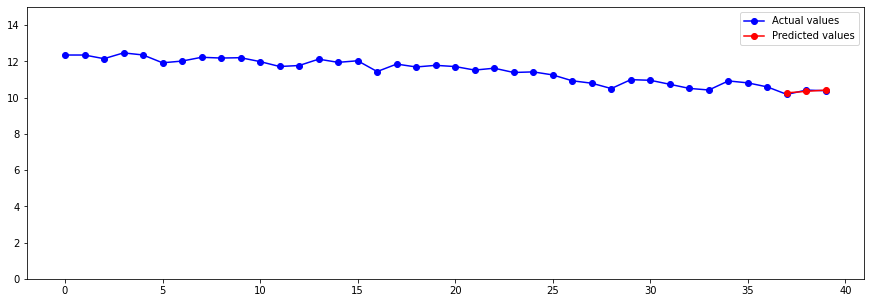

In [48]:
def full_graph(predicted):
    predictionsArray = np.asarray(predicted)
    zerosArray = np.zeros(ts.values.size-len(predictionsArray.flatten()))
    cleanPrediction = pd.Series(np.concatenate((zerosArray,predictionsArray))).replace(0,np.NaN)

    # plot
    plt.plot(ts.values,marker='o', color='blue',label='Actual values')
    plt.plot(cleanPrediction,marker='o', color='red',label='Predicted values')
    plt.ylim([0,15])
    plt.legend()

    plt.show()
full_graph(last_prediction)

Dit is de grafische weergaven van de laatste waarden van de cross validation

### LSTM

In [49]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import tensorflow as tf
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
def build_model(raw_seq, n_steps_in, n_steps_out, n_features):
    # split into samples
    X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
    
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(n_steps_out))
    model.compile(optimizer='adam', loss='mse')
    
    # fit model
    model.fit(X, y, epochs=50, verbose=0)
    
    return model


def predict(x_input, model, n_features):
    n_features = 1
    x_input = x_input.reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    return yhat

In [50]:
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
import sys

# Disabled tf warning because of clutter
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

maes = []

for train_index, test_index in tscv.split(ts_moving_avg_diff):
    # variables
    n_steps_in = 3
    n_steps_out = 3
    n_features  = 1

    # initialize cross validation train and test sets
    y_train, y_test = ts_moving_avg_diff.iloc[train_index], ts_moving_avg_diff.iloc[test_index]
       
    print("TRAIN:", train_index, "TEST:", test_index) # visiualize cross_validation structure for reference

    # build model
    lstm_model = build_model(y_train, n_steps_in, n_steps_out, n_features)

    # make predictions
    x_input = array(y_test)
    y_predicted = predict(x_input, lstm_model, n_features).flatten()
    y_actual = y_test.values
    
    # error calc
    maes.append(mean_absolute_error(y_actual, y_predicted))
    
    # last actual prediction 
    last_prediction = y_predicted + moving_avg.dropna().iloc[test_index]

mae_mean = np.mean(maes)
print()
print("Mean MAE: {}".format(mae_mean))
MAE_ARIMA = mae_mean

TRAIN: [0 1 2 3 4 5 6 7] TEST: [ 8  9 10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10] TEST: [11 12 13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14 15 16]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] TEST: [17 18 19]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [20 21 22]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] TEST: [23 24 25]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25] TEST: [26 27 28]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28] TEST: [29 30 31]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] TEST: [32 33 34]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34] TEST: [35 36 37]

Mean MAE: 0.18474475919670313


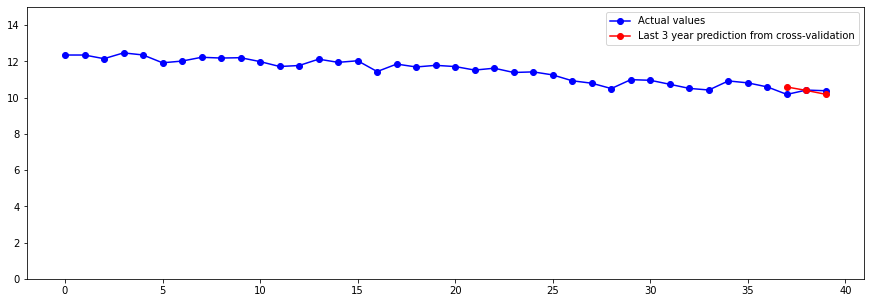

In [51]:
def full_graph(predicted):
    predictionsArray = np.asarray(predicted)
    zerosArray = np.zeros(ts.values.size-len(predictionsArray.flatten()))
    cleanPrediction = pd.Series(np.concatenate((zerosArray,predictionsArray))).replace(0,np.NaN)

    # plot
    plt.plot(ts.values,marker='o', color='blue',label='Actual values')
    plt.plot(cleanPrediction,marker='o', color='red',label='Last 3 year prediction from cross-validation')
    plt.ylim([0,15])
    plt.legend()

    plt.show()
full_graph(last_prediction)

### Prophet

### Polynomiale Regressie

In [52]:
ts

Year
1979    12.349634
1980    12.349545
1981    12.147230
1982    12.467336
1983    12.353095
1984    11.920382
1985    12.015835
1986    12.224548
1987    12.183318
1988    12.201616
1989    11.986788
1990    11.716385
1991    11.770302
1992    12.121065
1993    11.945254
1994    12.032209
1995    11.437963
1996    11.850327
1997    11.689949
1998    11.780257
1999    11.712603
2000    11.518993
2001    11.621888
2002    11.385820
2003    11.419148
2004    11.251586
2005    10.927786
2006    10.793886
2007    10.499133
2008    10.990294
2009    10.955518
2010    10.734207
2011    10.507405
2012    10.419335
2013    10.920494
2014    10.812470
2015    10.588599
2016    10.176126
2017    10.415373
2018    10.377886
Name: ice_extent, dtype: float64

In [27]:
X_train = ts.index.values[:-testsize]
X_test = ts.index.values[-testsize:]

In [28]:
y_train = train
y_test = test

NameError: name 'train' is not defined

In [ ]:
ts.values

In [ ]:
# Create an array with ints to provide index/y values

X_train = pd.DataFrame(range(0,ts.shape[0]))[:-testsize]
X_test = pd.DataFrame(range(0,ts.shape[0]))[-testsize:]

# y_train = ts.reset_index().drop(columns='Date').squeeze()[:-testsize]
# y_test = ts.reset_index().drop(columns='Date').squeeze()[-testsize:]

In [ ]:
X_test

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Prepare variables that keep track of the best fitting polynomial
BestR2 = -float('inf')
BestRMSPE = float('inf')
BestIR2 = 1
BestIRMSPE = 1



# Loop over polynomials from degrees 1 to 10 and use polynomial that fits best according to the 
for i in range(1,10):
    
    # Create PolynomialFeatures from the first degree
    poly = PolynomialFeatures(degree=i)
    
    # Fit the inputdata from your trainingsset to the polynomial
    X_train_transform = poly.fit_transform(X_train)
    
    # Create the model and fit it to the transformed inputdata and your expected outputdata from the trainingsdata
    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    # Transform the inputdata from your 
    X_test_transform = poly.fit_transform(X_test)
    y_predict_test = model.predict(X_test_transform)    
    
    # Calculate errors
    RMSPE_test = calc_rmspe(y_test, y_predict_test)

    # Print errors
    print('RMSPE for i = ' + str(i) + ' is ' + str(RMSPE_test) )
    print()
    
    # Update best fit
    if BestRMSPE > RMSPE_test:
        BestRMSPE = RMSPE_test
        BestRMSPEi = i
        
# Conclude best results
# print('Best i value according to r2 is '+str(BestR2i)+' with r2: '+str(BestR2))
print('Best i value according to RMSPE is '+str(BestRMSPEi)+' with RMSPE: '+str(BestRMSPE))

In [ ]:
# Recreate best model
poly = PolynomialFeatures(degree=BestRMSPEi)
X_train_transform = poly.fit_transform(X_train)   
X_test_transform = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_transform,y_train)
y_predict = model.predict(X_test_transform)

In [ ]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_ + model.coef_[0][1] * x 
#     for i in range(0, len(model.coef_)):
#         result += model.coef_[i] * x 
    return result

In [ ]:
t1

In [ ]:
model.coef_

In [ ]:
p(t1)

In [ ]:
# Plot the dataset
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train, color='red')
plt.xlabel('Day')
plt.ylabel('Stock')

# Plot the polynomial
t1 = np.arange(0, 40, 1)
plt.plot(t1, p(t1.flatten()), color='blue')
plt.show()


In [ ]:
full_graph(y_predict)
rmspe_PR[0]

### Evaluation

In [ ]:
print('ARIMA rmspe:\t %.3f' % rmspe_ARIMA)
print('ARIMA r2:\t %.3f' % r2_ARIMA)
print()
print('LSTM rmspe:\t %.3f' % rmspe_LSTM)
print('LSTM r2:\t %.3f' % r2_LSTM)
print()
print('PR rmspe:\t %.3f' % rmspe_PR)
print('PR r2:\t\t %.3f' % r2_PR)